In [12]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv("ce889_dataCollection.csv")

# Remove duplicate entries
data = data.drop_duplicates()

# Delete incomplete data entries (rows with missing values)
data = data.dropna()

# Normalize each column
for i in range(4):
    col_max = data.iloc[:, i].max()
    col_min = data.iloc[:, i].min()
    data.iloc[:, i] = (data.iloc[:, i] - col_min) / (col_max - col_min)

# Save the preprocessed data to a new CSV file without the header
data.to_csv('updated_file.csv', index=False, header=False, float_format='%.6f')


>epoch=0, lrate=0.01, train_rmse=0.16652214812482594, accuracy=0.5482306448715646, val_rmse=0.21092106019113455, val_accuracy=0.5775862068965517
>epoch=1, lrate=0.01, train_rmse=0.16354712857688056, accuracy=0.5421232261541226, val_rmse=0.20804087749300426, val_accuracy=0.4870689655172414
>epoch=2, lrate=0.01, train_rmse=0.16435124810364884, accuracy=0.5151787318124663, val_rmse=0.20414812778460273, val_accuracy=0.3290229885057471
>epoch=3, lrate=0.01, train_rmse=0.1636773900384443, accuracy=0.492006466678642, val_rmse=0.1971542534049339, val_accuracy=0.21336206896551724
>epoch=4, lrate=0.01, train_rmse=0.15862852720828052, accuracy=0.512304652416023, val_rmse=0.18359233706072273, val_accuracy=0.5775862068965517
>epoch=5, lrate=0.01, train_rmse=0.1481773468653131, accuracy=0.6105622417819292, val_rmse=0.16681808130516068, val_accuracy=0.8038793103448276
>epoch=6, lrate=0.01, train_rmse=0.13798087364991501, accuracy=0.7034309322795043, val_rmse=0.1549371133354901, val_accuracy=0.8038793

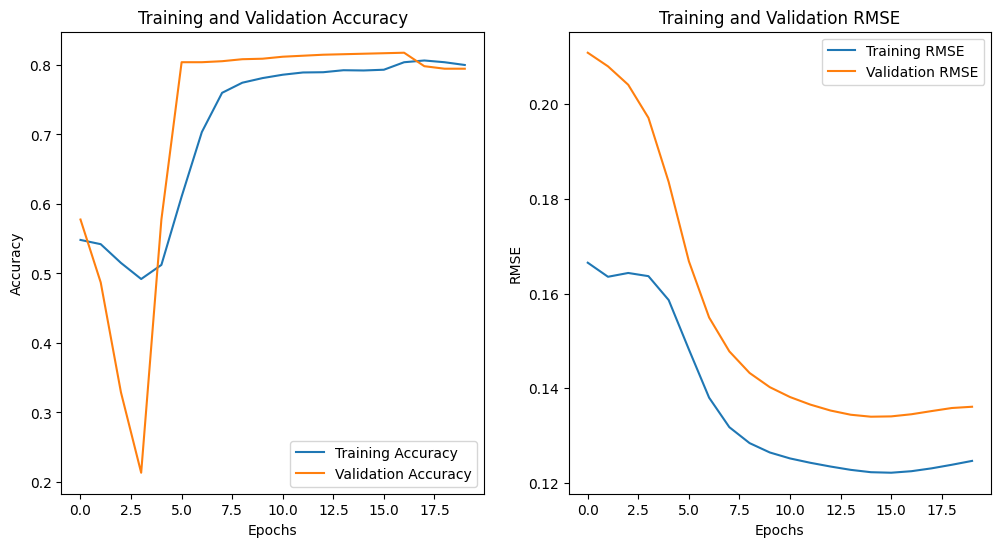

Row: [0.479355, 0.279633, 0.908268, 0.596345], Expected: [0.908268, 0.596345], Predicted: [0.778797039684316, 0.5800836905323759]
Row: [0.478857, 0.270548, 0.915933, 0.593347], Expected: [0.915933, 0.593347], Predicted: [0.7878132276657395, 0.5792845476076958]
Row: [0.478388, 0.26133, 0.923598, 0.59035], Expected: [0.923598, 0.59035], Predicted: [0.7968083201399558, 0.578445218337148]
Row: [0.477946, 0.251978, 0.931263, 0.587353], Expected: [0.931263, 0.587353], Predicted: [0.8057620715214069, 0.5775633304434116]
Row: [0.477533, 0.242493, 0.938928, 0.584356], Expected: [0.938928, 0.584356], Predicted: [0.8146519219931915, 0.5766392299873663]
Row: [0.477148, 0.232874, 0.946593, 0.581358], Expected: [0.946593, 0.581358], Predicted: [0.8234568937048293, 0.5756715139120131]
Row: [0.47679, 0.223121, 0.954258, 0.578361], Expected: [0.954258, 0.578361], Predicted: [0.8321549919622244, 0.57465906260051]
Row: [0.476461, 0.213235, 0.961923, 0.575364], Expected: [0.961923, 0.575364], Predicted: [

In [21]:
from math import exp, sqrt
from random import random
import csv
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split



# we creat  NeuralNetwork class witch includes :
# initialize_network,activate, transfer , forward_propagate , transfer_derivative ,backward_propagate_error ,update_weights 
# ,train_with_early_stopping and evaluate
class NeuralNetwork:
    # we have 4 value for init function 
    # my code is designed to be generalizable for all features: number of input neurones , hiien layer neurones , output neurones   
    # The momentum factor is a coefficient that is applied to an extra term in the weights update:
    #  typical values for the momentum parameter often fall in the range of 0.8 to 0.9
    def __init__(self, n_inputs, n_hidden, n_outputs, momentum_factor=0.9):
        self.network = self.initialize_network(n_inputs, n_hidden, n_outputs)
        self.momentum_factor = momentum_factor
        self.previous_weight_update = None


    # in this part,we  initialize the  network as an empty list=network 
    # for creating and initializing the weights for the hidden and output layers  
    #  the range of the initialized weights is  [-0.01, 0.01)
    def initialize_network(self, n_inputs, n_hidden, n_outputs):
        network = []
        hidden_layer = []
        for _ in range(n_hidden):
            weights = [(random() * 0.02) - 0.01 for _ in range(n_inputs + 1)]
            neuron = {'weights': weights}
            hidden_layer.append(neuron)
        network.append(hidden_layer)
        output_layer = []
        for _ in range(n_outputs):
            weights = [(random() * 0.02) - 0.01 for _ in range(n_hidden + 1)]
            neuron = {'weights': weights}
            output_layer.append(neuron)
        network.append(output_layer)
        return network

    # this function do this :a=bias +∑ wi  *xi
    def activate(self, weights, inputs):
        # this is the bias 
        activation = weights[-1]
        for i in range(len(weights)-1):
            activation += weights[i] * inputs[i]
        return activation


    
    # sigmoid activation function
    def sigmoid_activation(self, activation):
        # because i got some error related to overflow, use np.clip to prevent it 
        # ensure that  value of activation is within the range of -500 to 500
        activation = np.clip(activation, -500, 500)
        return 1.0 / (1.0 + np.exp(-activation))


    # forward propagation
    def forward_propagate(self, row):
        inputs = row
        for layer in self.network:
            new_inputs = []
            for neuron in layer:
                #  Computes the weighted sum of inputs using the neuron's weights and activates it
                activation = self.activate(neuron['weights'], inputs)
                # Computes the output of the neuron by applying a sigmoid_activation function to the activation value. If the neuron is not the last one in the layer,
                # the transfer function is applied; else, the activation value is used directly.
                if layer.index(neuron) != len(layer) - 1:
                    neuron['output'] = self.sigmoid_activation(activation)
                else:
                    neuron['output'] = activation
                new_inputs.append(neuron['output'])
            # Updates the inputs for the next layer to be the outputs computed in the current layer.
            inputs = new_inputs
        return inputs

    
    # why do we need sigmoid_derivative function?
    # The derivative of the sigmoid function is often used in the backpropagation algorithm during the training of neural networks
    #  In backpropagation, the error is propagated backward through the network, and the weights are updated to minimize the error. 
    # The derivative of the activation function is used to compute the gradient of the error with respect to the output of a neuron.
    def sigmoid_derivative(self, output):
        # output is the output of a neuron, which is the result of the sigmoid activation.
        return output * (1.0 - output)

    
    # totally we eant to compute the errors and delta values for each neuron in each layer during the backpropagation step of training 
    # we need thevalue of delta for computing weights to mnimize the error  in training step 
    def backward_propagate_error(self, expected):
        # This loop iterates through the layers of the neural network in reverse order, 
        # starting from the output layer and moving towards the input layer.
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = []
            #  Checks if the current layer is not the output layer.
            if i != len(self.network) - 1:
                for j in range(len(layer)):
                    error = 0.0
                    #  Iterates through neurons in the next layer
                    for neuron in self.network[i + 1]:
                        # calculate the error based on the weights and error signal (delta) of neurons in the next layer.
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            #  it is the output layer
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(expected[j] - neuron['output'])
            # now we want to calculate the delta values for each neuron in the current layer
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * self.sigmoid_derivative(neuron['output'])


    
    def update_weights(self, row, l_rate):
        if self.previous_weight_update is None:
            self.previous_weight_update = [[[0.0] * len(neuron['weights']) for neuron in layer] for layer in self.network]

        for i in range(len(self.network)):
            inputs = row[:-2]
            if i != 0:
                inputs = [neuron['output'] for neuron in self.network[i - 1]]
            for j in range(len(self.network[i])):
                neuron = self.network[i][j]
                for k in range(len(inputs)):
                    # Calculate the change in weights with momentum
                    delta_weight = l_rate * neuron['delta'] * inputs[k] + self.momentum_factor * self.previous_weight_update[i][j][k]
                    # Update weights
                    neuron['weights'][k] += delta_weight
                    # Update the previous weight update for the next iteration
                    self.previous_weight_update[i][j][k] = delta_weight
                # Update the bias term
                neuron['weights'][-1] += l_rate * neuron['delta'] + self.momentum_factor * self.previous_weight_update[i][j][-1]
      

   # patience: A parameter for early stopping,
    # representing the number of epochs with no improvement on the validation set after which training should be stopped.
    def train_with_early_stopping(self, train, validation, l_rate, n_epoch, patience=5):
        # float('inf')=is used to initialize best validation_error to positive infinity, 
        # ensuring that the first validation error encountered will always be considered as the best initially.
        best_validation_error = float('inf')
        best_epoch = 0
    
        accuracies = []
        val_accuracies = []
        train_errors = []
        validation_errors = []
        train_rmse_list = []
        val_rmse_list = []
    
        for epoch in range(n_epoch):
            sum_error = 0
            correct_predictions = 0

            # Loop through each row in the training dataset.
            for row in train:
                # do forward propagation to get the model's output, # calculate the error between the predicted and expected values
                outputs = self.forward_propagate(row)
                # extracting the last two elements of the row list and assigning them to the variable expected
                expected = row[-2:]
                # update sum_error with the RMSE.
                sum_error += (sum((expected[i] - outputs[i]) ** 2 for i in range(len(expected))) / len(expected)) ** 0.5

    
                if np.argmax(outputs) == np.argmax(expected):
                    correct_predictions += 1
                # implement  backward propagation to update the model's weights based on the calculated error.
                self.backward_propagate_error(expected)
                self.update_weights(row, l_rate)
    
            accuracy = correct_predictions / len(train)
            train_rmse = sum_error / len(train)
            validation_error = 0
            correct_val_predictions = 0

            
            # do all before implements for validation now 
            for val_row in validation:
                val_outputs = self.forward_propagate(val_row)
                val_expected = val_row[-2:]
                validation_error += np.sqrt(np.mean([(val_expected[i] - val_outputs[i]) ** 2 for i in range(len(val_expected))]))
    
                if np.argmax(val_outputs) == np.argmax(val_expected):
                    correct_val_predictions += 1
    
            validation_accuracy = correct_val_predictions / len(validation)
            val_rmse = validation_error / len(validation)
    
            accuracies.append(accuracy)
            val_accuracies.append(validation_accuracy)
            train_errors.append(sum_error)
            validation_errors.append(validation_error)
            train_rmse_list.append(train_rmse)
            val_rmse_list.append(val_rmse)
    
            print(f'>epoch={epoch}, lrate={l_rate}, train_rmse={train_rmse}, accuracy={accuracy}, val_rmse={val_rmse}, val_accuracy={validation_accuracy}')
    
            if validation_error < best_validation_error:
                best_validation_error = validation_error
                best_epoch = epoch
                
            # If the training has gone for a certain number of epochs without improvement in validation error (specified by patience), 
            # print a message about early stopping and break out of the training loop.
            elif epoch - best_epoch >= patience:
                print(f"Early stopping at epoch {epoch} based on validation error.")
                break
    
        return accuracies, val_accuracies, train_rmse_list, val_rmse_list


    # evaluate the neural network on a given dataset
    def evaluate(self, dataset):
        for row in dataset:
            # predict output for each row in dataset
            outputs = self.forward_propagate(row)
            # 2 first column in dataset
            expected = row[-2:]
            print(f"Row: {row}, Expected: {expected}, Predicted: {outputs}")



    def get_weights(self):
        return [neuron['weights'] for layer in self.network for neuron in layer]

    def get_biases(self):
        return [neuron['weights'][-1] for layer in self.network for neuron in layer]


    
# split dataset to training and validation 
def split_dataset(dataset, split_ratio):
    train_size = int(len(dataset) * split_ratio)
    train_set, validation_set = dataset[:train_size], dataset[train_size:]
    return train_set, validation_set

# read dataset 
def csv_to_list(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            float_row = [float(elem) for elem in row]
            dataset.append(float_row)
    return dataset

# this is dataset after preprocessing
file_path = 'updated_file.csv'
dataset = csv_to_list(file_path)

# Split the dataset into training and validation sets
train_set, validation_set = split_dataset(dataset, split_ratio=0.8)

n_inputs = len(train_set[0]) - 2
 # Adjust  based on your output dimension
n_outputs = 2 
# make an object from NeuralNetwork class
nn = NeuralNetwork(n_inputs,5, n_outputs)

learning_rate = 0.01 
accuracies, val_accuracies, train_errors, validation_errors = nn.train_with_early_stopping(train_set, validation_set, learning_rate, 100, patience=5)


# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(accuracies)), accuracies, label='Training Accuracy')
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_errors)), train_errors, label='Training RMSE')
plt.plot(range(len(validation_errors)), validation_errors, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Evaluation (print predicted values)
nn.evaluate(validation_set)